<a href="https://colab.research.google.com/github/pavithrapavi956/AICTE-Next24Tech/blob/main/E_commerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **E-commerce Product Recommendation System**

**Importing the libraries**

In [ ]:
!pip install matplotlib-venn
!apt-get -qq install -y libfluidsynth1
!pip install ydata-profiling
from ydata_profiling import ProfileReport

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
# current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

import missingno as msno # missing data visualization module for Python
import pandas_profiling

import gc
import datetime

%matplotlib inline
color = sns.color_palette()

E: Package 'libfluidsynth1' has no installation candidate


In [ ]:
pd.set_option('display.max_rows', 10000)
pd.set_option('display.max_columns', 100)
data = pd.read_csv("/content/data(CLEAN).zip")

In [ ]:
data.head()

,invoice_num,invoice_date,year_month,month,day,hour,stock_code,description,quantity,unit_price,amount_spent,cust_id,country
0,536365,2010-12-01 08:26:00,201012,12,3,8,85123A,white hanging heart t-light holder,6,2.55,15.30,17850,United Kingdom
1,536365,2010-12-01 08:26:00,201012,12,3,8,71053,white metal lantern,6,3.39,20.34,17850,United Kingdom
2,536365,2010-12-01 08:26:00,201012,12,3,8,84406B,cream cupid hearts coat hanger,8,2.75,22.00,17850,United Kingdom
3,536365,2010-12-01 08:26:00,201012,12,3,8,84029G,knitted union flag hot water bottle,6,3.39,20.34,17850,United Kingdom
4,536365,2010-12-01 08:26:00,201012,12,3,8,84029E,red woolly hottie white heart.,6,3.39,20.34,17850,United Kingdom


In [ ]:
data.rename(index=str, columns={'InvoiceNo': 'invoice_num',
                              'StockCode' : 'stock_code',
                              'Description' : 'description',
                              'Quantity' : 'quantity',
                              'InvoiceDate' : 'invoice_date',
                              'UnitPrice' : 'unit_price',
                              'CustomerID' : 'cust_id',
                              'Country' : 'country'}, inplace=True)

In [ ]:
data.head()

,invoice_num,invoice_date,year_month,month,day,hour,stock_code,description,quantity,unit_price,amount_spent,cust_id,country
0,536365,2010-12-01 08:26:00,201012,12,3,8,85123A,white hanging heart t-light holder,6,2.55,15.30,17850,United Kingdom
1,536365,2010-12-01 08:26:00,201012,12,3,8,71053,white metal lantern,6,3.39,20.34,17850,United Kingdom
2,536365,2010-12-01 08:26:00,201012,12,3,8,84406B,cream cupid hearts coat hanger,8,2.75,22.00,17850,United Kingdom
3,536365,2010-12-01 08:26:00,201012,12,3,8,84029G,knitted union flag hot water bottle,6,3.39,20.34,17850,United Kingdom
4,536365,2010-12-01 08:26:00,201012,12,3,8,84029E,red woolly hottie white heart.,6,3.39,20.34,17850,United Kingdom


**Data cleaning**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397924 entries, 0 to 397923
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   invoice_num   397924 non-null  int64  
 1   invoice_date  397924 non-null  object 
 2   year_month    397924 non-null  int64  
 3   month         397924 non-null  int64  
 4   day           397924 non-null  int64  
 5   hour          397924 non-null  int64  
 6   stock_code    397924 non-null  object 
 7   description   397924 non-null  object 
 8   quantity      397924 non-null  int64  
 9   unit_price    397924 non-null  float64
 10  amount_spent  397924 non-null  float64
 11  cust_id       397924 non-null  int64  
 12  country       397924 non-null  object 
dtypes: float64(2), int64(7), object(4)
memory usage: 42.5+ MB


**Check missing values for each column**

In [ ]:
data.isnull().sum().sort_values(ascending=False)
data[data.isnull().any(axis=1)].head()

,invoice_num,invoice_date,year_month,month,day,hour,stock_code,description,quantity,unit_price,amount_spent,cust_id,country


In [ ]:
data.isnull().sum().sort_values(ascending=False)

,0
invoice_num,0
invoice_date,0
year_month,0
month,0
day,0
hour,0
stock_code,0
description,0
quantity,0
unit_price,0


In [ ]:
# check out the rows with missing values
data[data.isnull().any(axis=1)].head()

,invoice_num,invoice_date,year_month,month,day,hour,stock_code,description,quantity,unit_price,amount_spent,cust_id,country


In [ ]:
# change the invoice_date format - String to Timestamp format
data['invoice_date'] = pd.to_datetime(data.invoice_date, format='%Y-%m-%d %H:%M:%S')



In [ ]:
data['description'] = data.description.str.lower()

In [ ]:
data.head()

,invoice_num,invoice_date,year_month,month,day,hour,stock_code,description,quantity,unit_price,amount_spent,cust_id,country
0,536365,2010-12-01 08:26:00,201012,12,3,8,85123A,white hanging heart t-light holder,6,2.55,15.30,17850,United Kingdom
1,536365,2010-12-01 08:26:00,201012,12,3,8,71053,white metal lantern,6,3.39,20.34,17850,United Kingdom
2,536365,2010-12-01 08:26:00,201012,12,3,8,84406B,cream cupid hearts coat hanger,8,2.75,22.00,17850,United Kingdom
3,536365,2010-12-01 08:26:00,201012,12,3,8,84029G,knitted union flag hot water bottle,6,3.39,20.34,17850,United Kingdom
4,536365,2010-12-01 08:26:00,201012,12,3,8,84029E,red woolly hottie white heart.,6,3.39,20.34,17850,United Kingdom


**Remove rows with missing values from the data**

In [ ]:
data_new = data.dropna()

In [ ]:
data_new.isnull().sum().sort_values(ascending=False)

,0
invoice_num,0
invoice_date,0
year_month,0
month,0
day,0
hour,0
stock_code,0
description,0
quantity,0
unit_price,0


In [ ]:

data_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397924 entries, 0 to 397923
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_num   397924 non-null  int64         
 1   invoice_date  397924 non-null  datetime64[ns]
 2   year_month    397924 non-null  int64         
 3   month         397924 non-null  int64         
 4   day           397924 non-null  int64         
 5   hour          397924 non-null  int64         
 6   stock_code    397924 non-null  object        
 7   description   397924 non-null  object        
 8   quantity      397924 non-null  int64         
 9   unit_price    397924 non-null  float64       
 10  amount_spent  397924 non-null  float64       
 11  cust_id       397924 non-null  int64         
 12  country       397924 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(7), object(3)
memory usage: 50.6+ MB


In [ ]:
data_new['cust_id'] = data_new['cust_id'].astype('int64')
data_new.head()

,invoice_num,invoice_date,year_month,month,day,hour,stock_code,description,quantity,unit_price,amount_spent,cust_id,country
0,536365,2010-12-01 08:26:00,201012,12,3,8,85123A,white hanging heart t-light holder,6,2.55,15.30,17850,United Kingdom
1,536365,2010-12-01 08:26:00,201012,12,3,8,71053,white metal lantern,6,3.39,20.34,17850,United Kingdom
2,536365,2010-12-01 08:26:00,201012,12,3,8,84406B,cream cupid hearts coat hanger,8,2.75,22.00,17850,United Kingdom
3,536365,2010-12-01 08:26:00,201012,12,3,8,84029G,knitted union flag hot water bottle,6,3.39,20.34,17850,United Kingdom
4,536365,2010-12-01 08:26:00,201012,12,3,8,84029E,red woolly hottie white heart.,6,3.39,20.34,17850,United Kingdom


In [ ]:
data_new.describe().round(2)

,invoice_num,invoice_date,year_month,month,day,hour,quantity,unit_price,amount_spent,cust_id
count,397924.00,397924,397924.00,397924.00,397924.00,397924.00,397924.00,397924.00,397924.00,397924.00
mean,560617.13,2011-07-10 23:43:36.912475648,201101.04,7.61,3.61,12.73,13.02,3.12,22.39,15294.32
min,536365.00,2010-12-01 08:26:00,201012.00,1.00,1.00,6.00,1.00,0.00,0.00,12346.00
25%,549234.00,2011-04-07 11:12:00,201104.00,5.00,2.00,11.00,2.00,1.25,4.68,13969.00
50%,561893.00,2011-07-31 14:39:00,201107.00,8.00,3.00,13.00,6.00,1.95,11.80,15159.00
75%,572090.00,2011-10-20 14:33:00,201110.00,11.00,5.00,14.00,12.00,3.75,19.80,16795.00
max,581587.00,2011-12-09 12:50:00,201112.00,12.00,7.00,20.00,80995.00,8142.75,168469.60,18287.00
std,13106.17,NaN,23.84,3.42,1.93,2.27,180.42,22.10,309.06,1713.17


**Remove Quantity with negative values**

In [ ]:
data_new = data_new[data_new.quantity > 0]
data_new.describe().round(2)

,invoice_num,invoice_date,year_month,month,day,hour,quantity,unit_price,amount_spent,cust_id
count,397924.00,397924,397924.00,397924.00,397924.00,397924.00,397924.00,397924.00,397924.00,397924.00
mean,560617.13,2011-07-10 23:43:36.912475648,201101.04,7.61,3.61,12.73,13.02,3.12,22.39,15294.32
min,536365.00,2010-12-01 08:26:00,201012.00,1.00,1.00,6.00,1.00,0.00,0.00,12346.00
25%,549234.00,2011-04-07 11:12:00,201104.00,5.00,2.00,11.00,2.00,1.25,4.68,13969.00
50%,561893.00,2011-07-31 14:39:00,201107.00,8.00,3.00,13.00,6.00,1.95,11.80,15159.00
75%,572090.00,2011-10-20 14:33:00,201110.00,11.00,5.00,14.00,12.00,3.75,19.80,16795.00
max,581587.00,2011-12-09 12:50:00,201112.00,12.00,7.00,20.00,80995.00,8142.75,168469.60,18287.00
std,13106.17,NaN,23.84,3.42,1.93,2.27,180.42,22.10,309.06,1713.17


**Add the column - amount_spent**

In [ ]:
data_new['amount_spent'] = data_new['quantity'] * data_new['unit_price']
data_new = data_new[['invoice_num','invoice_date','stock_code','description','quantity','unit_price','amount_spent','cust_id','country']]

**Add the columns - Month, Day and Hour for the invoice**

In [ ]:
data_new.insert(loc=2, column='year_month', value=data_new['invoice_date'].map(lambda x: 100*x.year + x.month))
data_new.insert(loc=3, column='month', value=data_new.invoice_date.dt.month)
data_new.insert(loc=4, column='day', value=(data_new.invoice_date.dt.dayofweek)+1)
data_new.insert(loc=5, column='hour', value=data_new.invoice_date.dt.hour)

In [ ]:
data_new.head()

,invoice_num,invoice_date,year_month,month,day,hour,stock_code,description,quantity,unit_price,amount_spent,cust_id,country
0,536365,2010-12-01 08:26:00,201012,12,3,8,85123A,white hanging heart t-light holder,6,2.55,15.30,17850,United Kingdom
1,536365,2010-12-01 08:26:00,201012,12,3,8,71053,white metal lantern,6,3.39,20.34,17850,United Kingdom
2,536365,2010-12-01 08:26:00,201012,12,3,8,84406B,cream cupid hearts coat hanger,8,2.75,22.00,17850,United Kingdom
3,536365,2010-12-01 08:26:00,201012,12,3,8,84029G,knitted union flag hot water bottle,6,3.39,20.34,17850,United Kingdom
4,536365,2010-12-01 08:26:00,201012,12,3,8,84029E,red woolly hottie white heart.,6,3.39,20.34,17850,United Kingdom


**Exploratory Data Analysis (EDA)**


**How many orders made by the customers?**

In [ ]:
data_new.groupby(by=['cust_id','country'], as_index=False)['invoice_num'].count().head()

,cust_id,country,invoice_num
0,12346,United Kingdom,1
1,12347,Iceland,182
2,12348,Finland,31
3,12349,Italy,73
4,12350,Norway,17


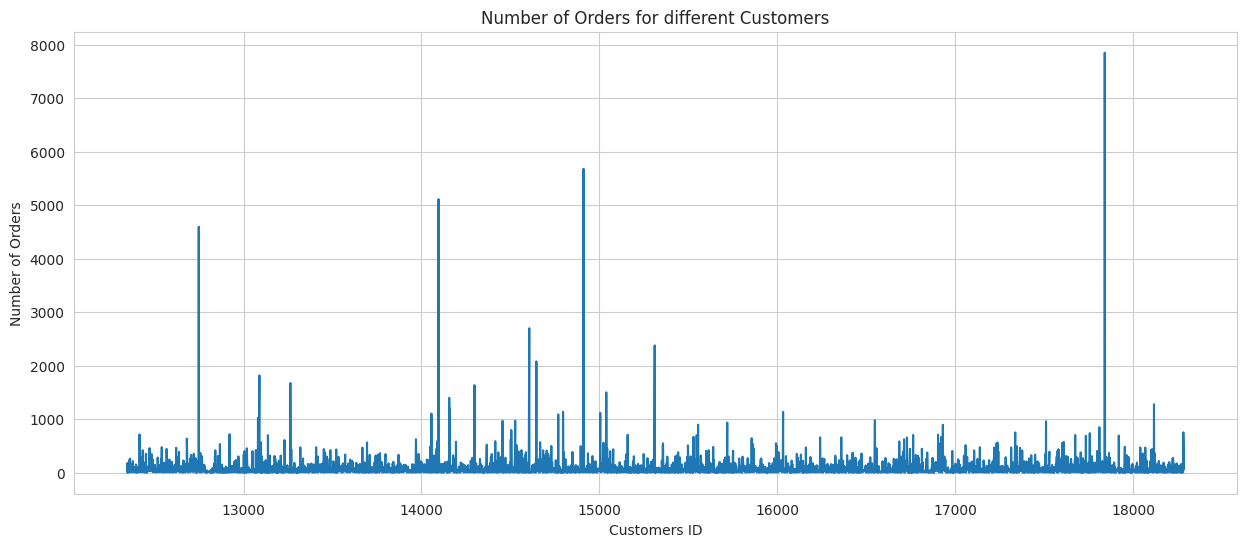

In [ ]:
orders = data_new.groupby(by=['cust_id','country'], as_index=False)['invoice_num'].count()

plt.subplots(figsize=(15,6))
plt.plot(orders.cust_id, orders.invoice_num)
plt.xlabel('Customers ID')
plt.ylabel('Number of Orders')
plt.title('Number of Orders for different Customers')
plt.show()

In [ ]:
print('The TOP 5 customers with most number of orders...')
orders.sort_values(by='invoice_num', ascending=False).head()

The TOP 5 customers with most number of orders...


,cust_id,country,invoice_num
4019,17841,United Kingdom,7847
1888,14911,EIRE,5677
1298,14096,United Kingdom,5111
334,12748,United Kingdom,4596
1670,14606,United Kingdom,2700


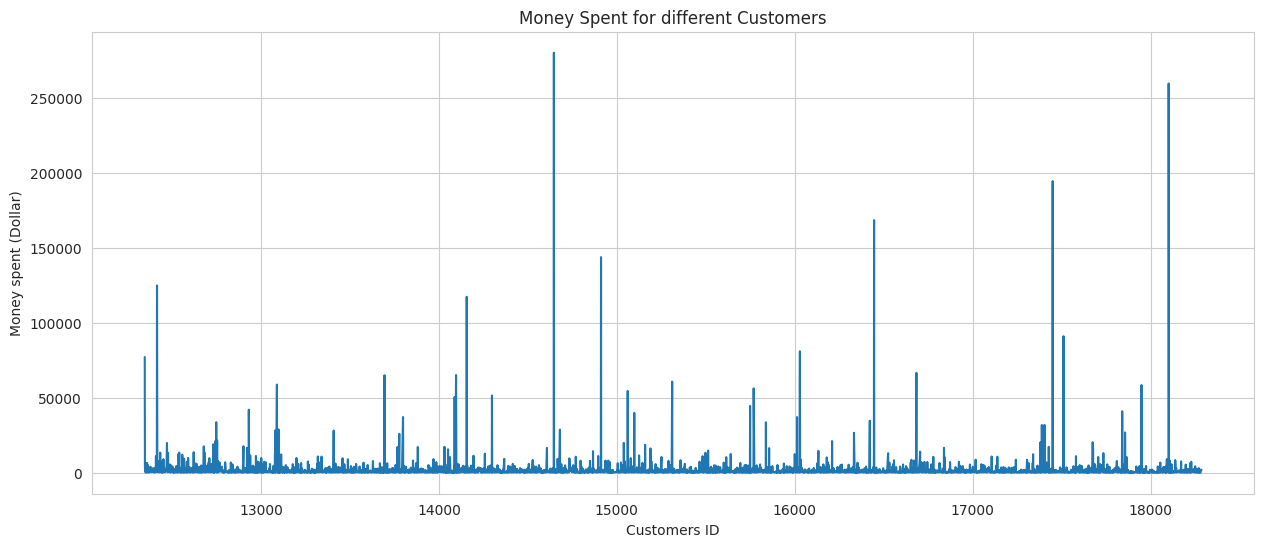

In [ ]:
money_spent = data_new.groupby(by=['cust_id','country'], as_index=False)['amount_spent'].sum()

plt.subplots(figsize=(15,6))
plt.plot(money_spent.cust_id, money_spent.amount_spent)
plt.xlabel('Customers ID')
plt.ylabel('Money spent (Dollar)')
plt.title('Money Spent for different Customers')
plt.show()


In [ ]:
print('The TOP 5 customers with highest money spent...')
money_spent.sort_values(by='amount_spent', ascending=False).head()

The TOP 5 customers with highest money spent...


,cust_id,country,amount_spent
1698,14646,Netherlands,280206.02
4210,18102,United Kingdom,259657.30
3737,17450,United Kingdom,194550.79
3017,16446,United Kingdom,168472.50
1888,14911,EIRE,143825.06


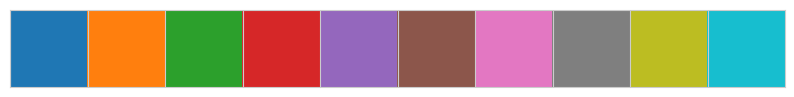

In [ ]:
sns.palplot(color)

In [ ]:
data_new.head()

,invoice_num,invoice_date,year_month,month,day,hour,stock_code,description,quantity,unit_price,amount_spent,cust_id,country
0,536365,2010-12-01 08:26:00,201012,12,3,8,85123A,white hanging heart t-light holder,6,2.55,15.30,17850,United Kingdom
1,536365,2010-12-01 08:26:00,201012,12,3,8,71053,white metal lantern,6,3.39,20.34,17850,United Kingdom
2,536365,2010-12-01 08:26:00,201012,12,3,8,84406B,cream cupid hearts coat hanger,8,2.75,22.00,17850,United Kingdom
3,536365,2010-12-01 08:26:00,201012,12,3,8,84029G,knitted union flag hot water bottle,6,3.39,20.34,17850,United Kingdom
4,536365,2010-12-01 08:26:00,201012,12,3,8,84029E,red woolly hottie white heart.,6,3.39,20.34,17850,United Kingdom


In [ ]:
data_new.groupby('invoice_num')['day'].unique().value_counts().sort_index()

,count
day,
[1],2863
[2],3185
[3],3455
[4],4033
[5],2831
[7],2169
